In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import os
# Define the save directory
save_dir = "/content/drive/MyDrive/FMC_Data/Figures_PE_SC_indices"
os.makedirs(save_dir, exist_ok=True)

In [3]:
# Load dataset

# Load dataset from Excel file
df = pd.read_excel('/content/drive/MyDrive/FMC_Data/M-B_data_by_purpose_domestic_residents/Combined_Indices_by_Dong_with_DongName.xlsx')

# Check the first few rows
df.head()

,DongCode,PE1_Nonwork_diffOD_intraSeoul,PE2_Nonwork_diffOD_Korea,PE3_Nonwork_allOD_intraSeoul,PE4_Nonwork_allOD_Korea,PE5_Work_diffOD_intraSeoul,PE6_Work_diffOD_Korea,PE7_Work_allOD_intraSeoul,PE8_Work_allOD_Korea,SC1_Nonwork,SC2_Work,FULL_NM,full_gu_name,SIDO_NM,SGG_NM,ADMI_NM
0,11110515,0.287584,0.296431,0.279759,0.288310,0.162682,0.146748,0.160513,0.146517,20.968226,12.462606,서울특별시 종로구 청운효자동,서울특별시 종로구,서울특별시,종로구,청운효자동
1,11110530,0.559293,0.546111,0.501187,0.499886,0.925562,0.897995,0.857813,0.849877,14.911437,24.390718,서울특별시 종로구 사직동,서울특별시 종로구,서울특별시,종로구,사직동
2,11110540,0.169136,0.162970,0.142422,0.141736,0.106723,0.096519,0.097452,0.090494,8.289952,10.087291,서울특별시 종로구 삼청동,서울특별시 종로구,서울특별시,종로구,삼청동
3,11110550,0.151784,0.148483,0.149923,0.147516,0.074800,0.065471,0.075752,0.066992,20.964832,9.778932,서울특별시 종로구 부암동,서울특별시 종로구,서울특별시,종로구,부암동
4,11110560,0.142028,0.140370,0.150192,0.147490,0.078464,0.069434,0.086648,0.076321,20.261651,10.439000,서울특별시 종로구 평창동,서울특별시 종로구,서울특별시,종로구,평창동


In [4]:
df.columns

Index(['DongCode', 'PE1_Nonwork_diffOD_intraSeoul', 'PE2_Nonwork_diffOD_Korea',
       'PE3_Nonwork_allOD_intraSeoul', 'PE4_Nonwork_allOD_Korea',
       'PE5_Work_diffOD_intraSeoul', 'PE6_Work_diffOD_Korea',
       'PE7_Work_allOD_intraSeoul', 'PE8_Work_allOD_Korea', 'SC1_Nonwork',
       'SC2_Work', 'FULL_NM', 'full_gu_name', 'SIDO_NM', 'SGG_NM', 'ADMI_NM'],
      dtype='object')

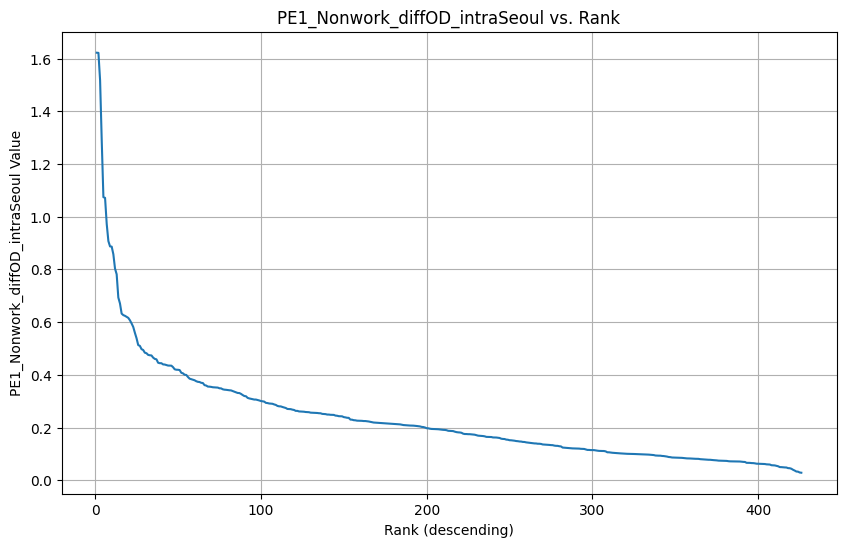

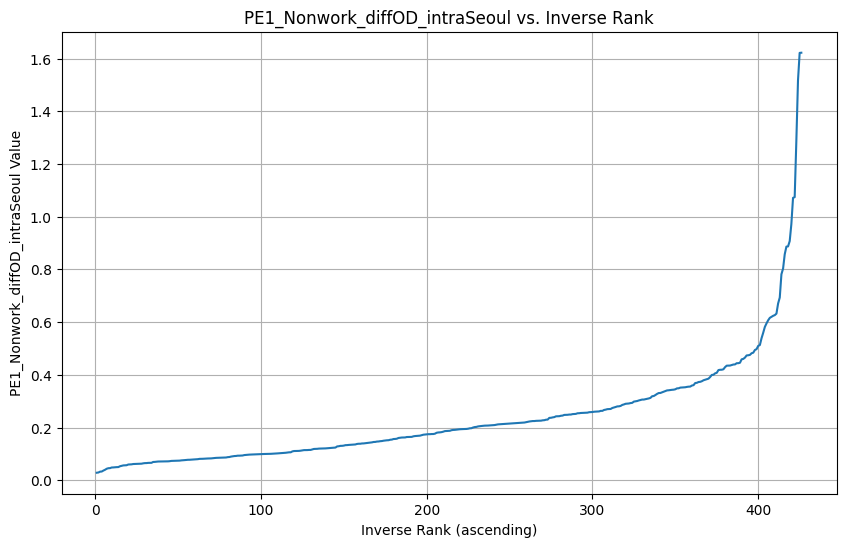

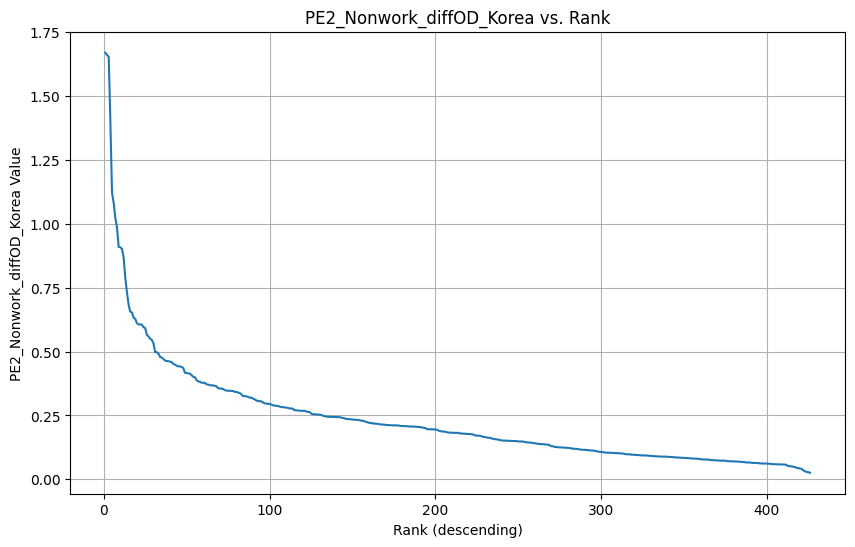

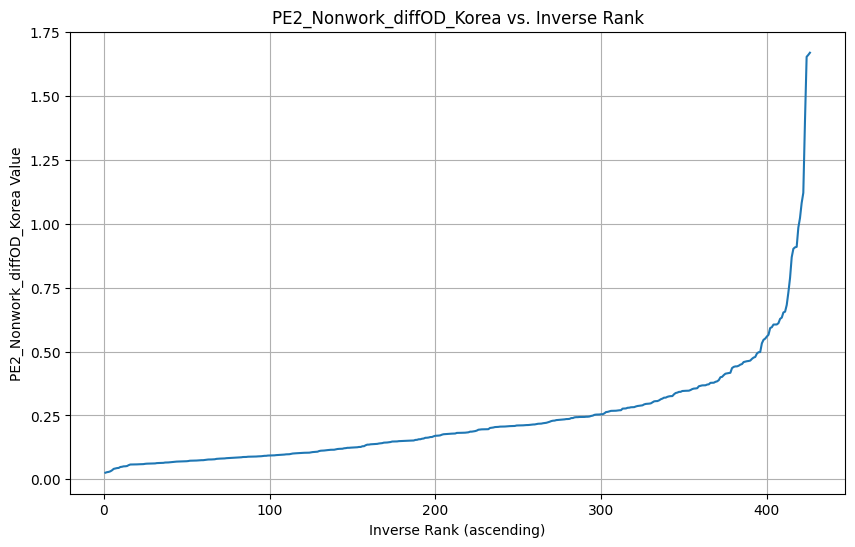

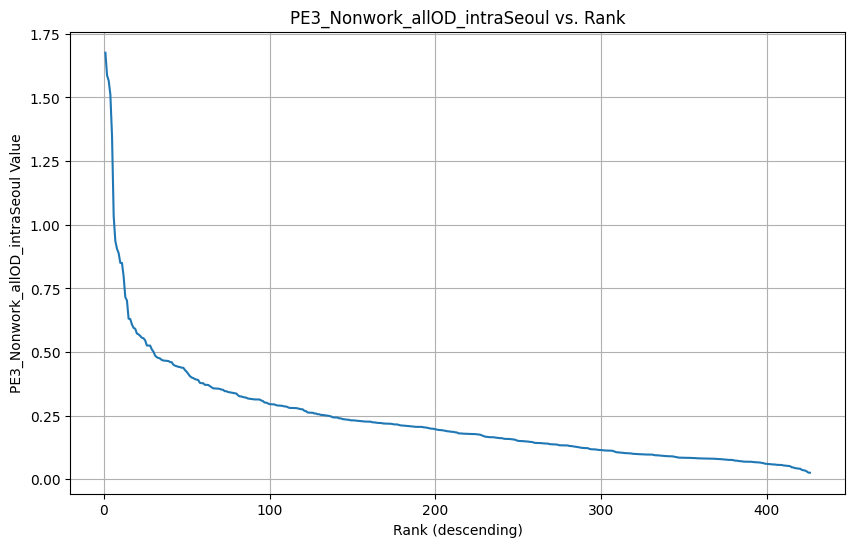

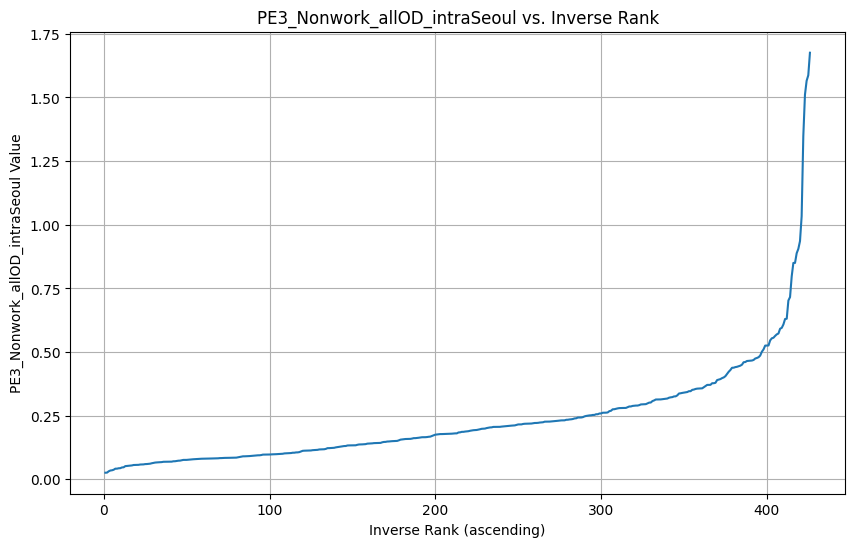

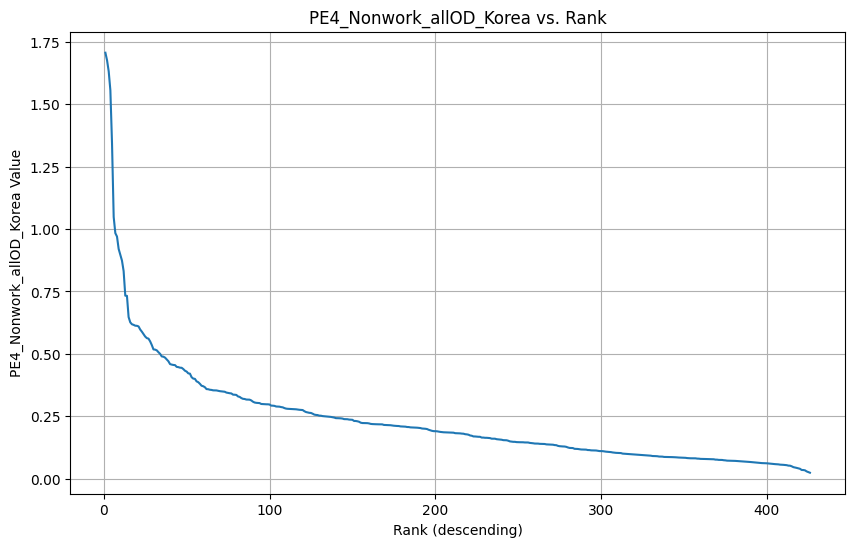

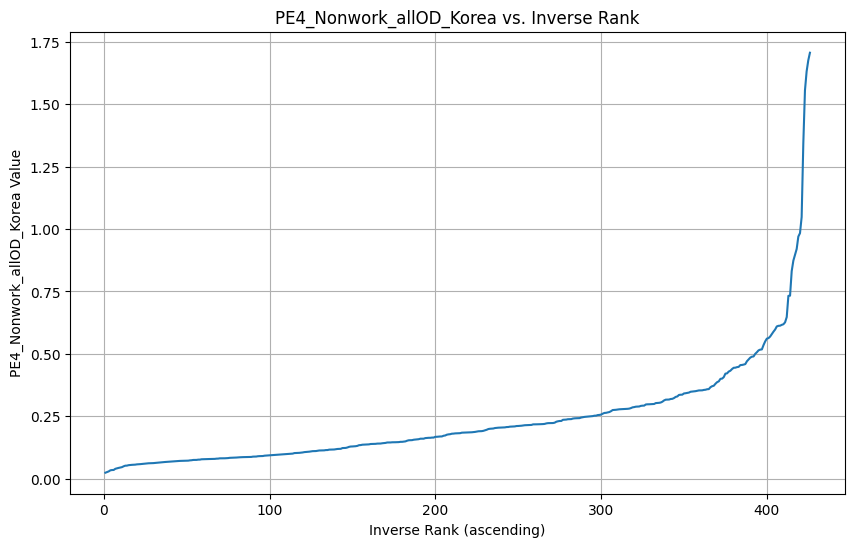

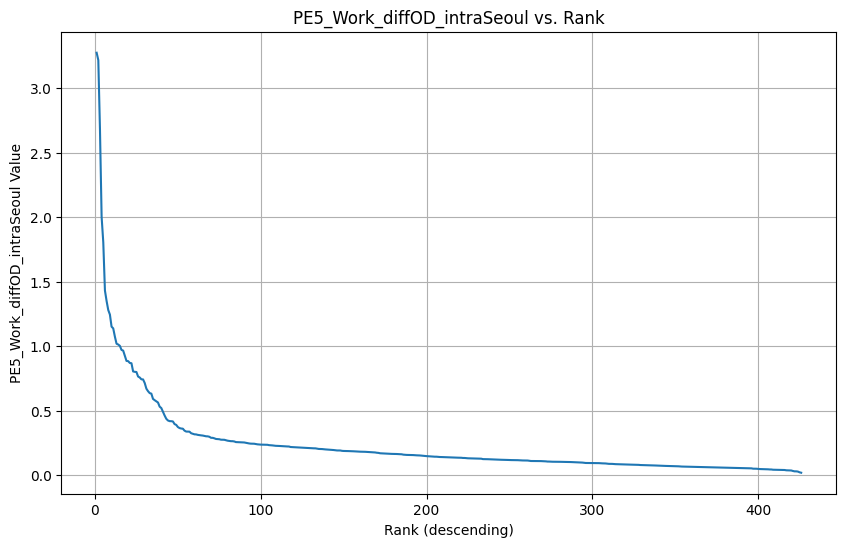

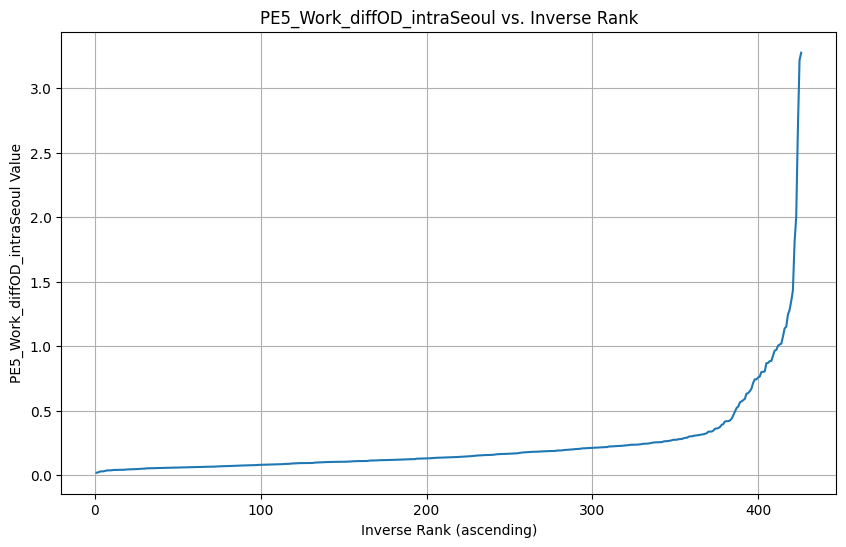

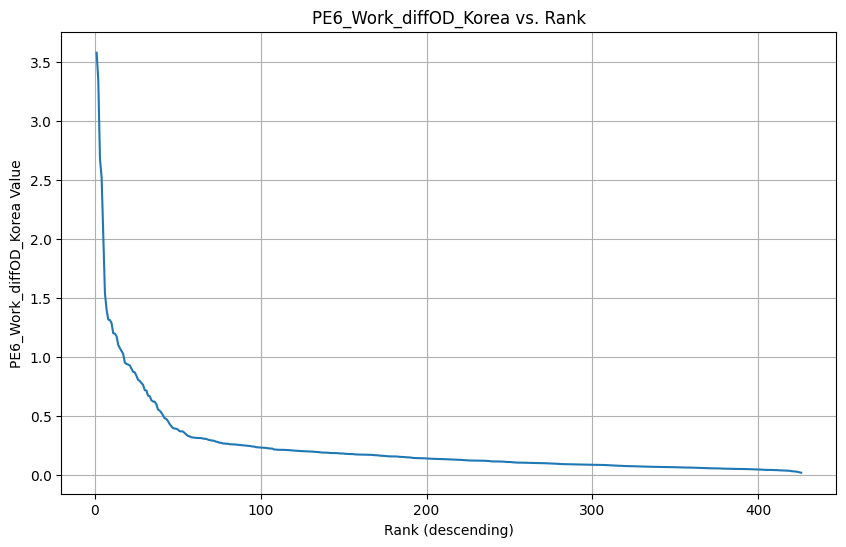

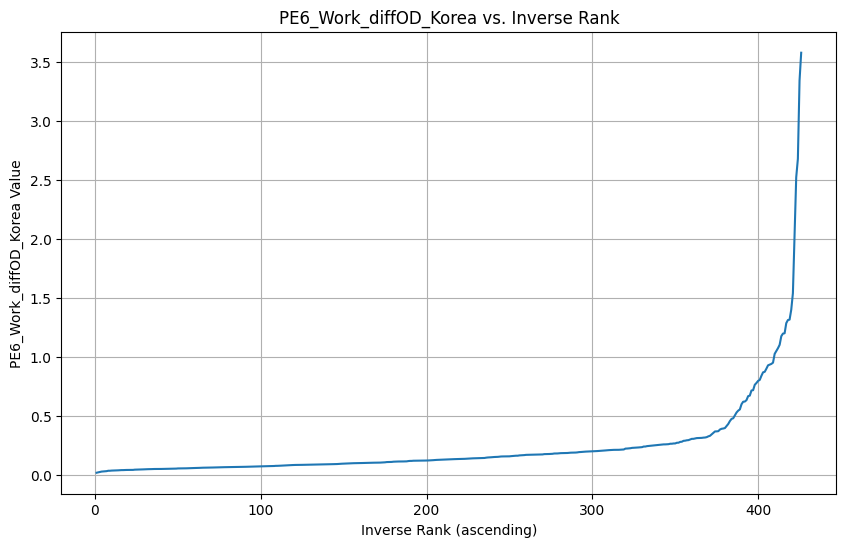

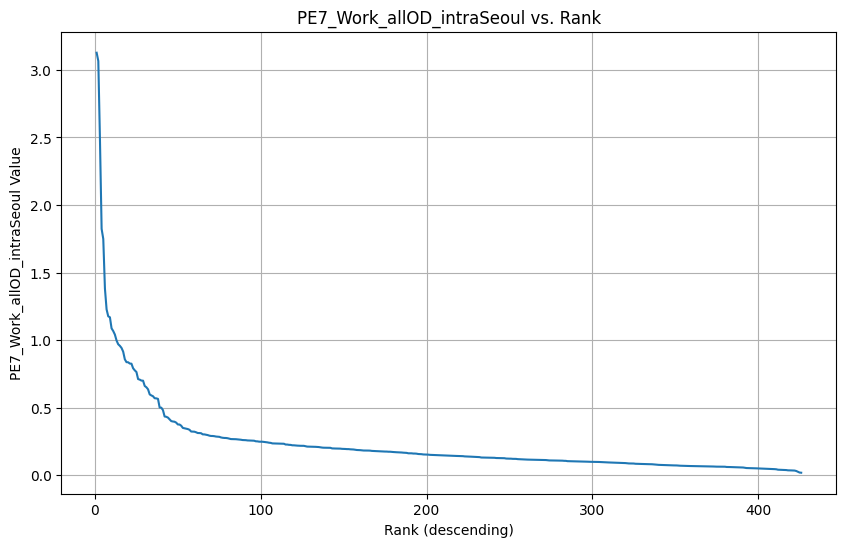

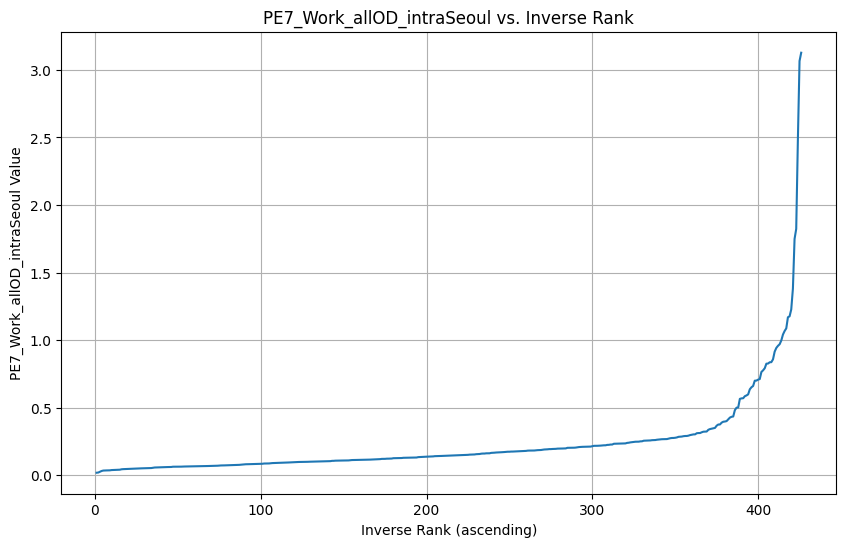

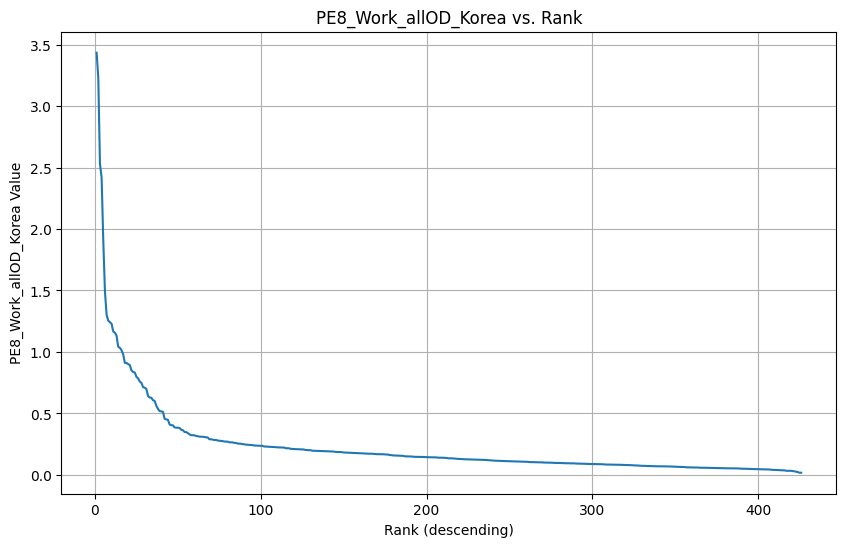

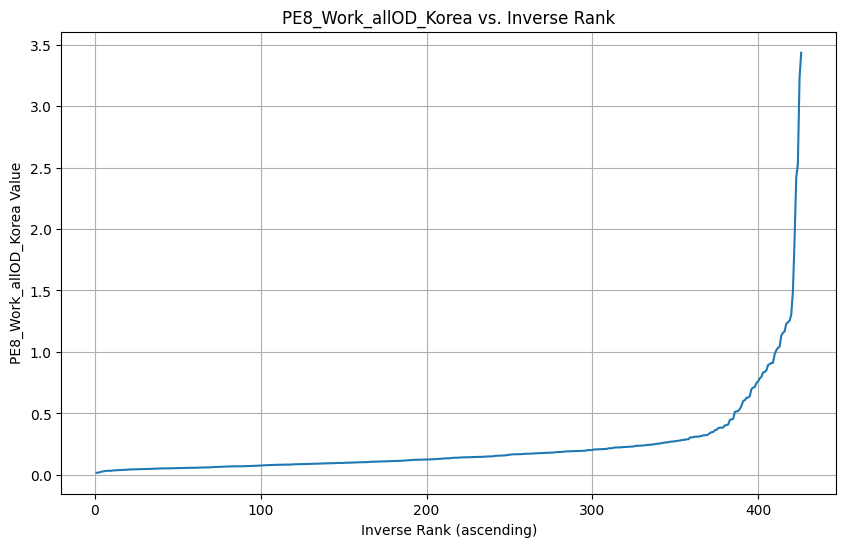

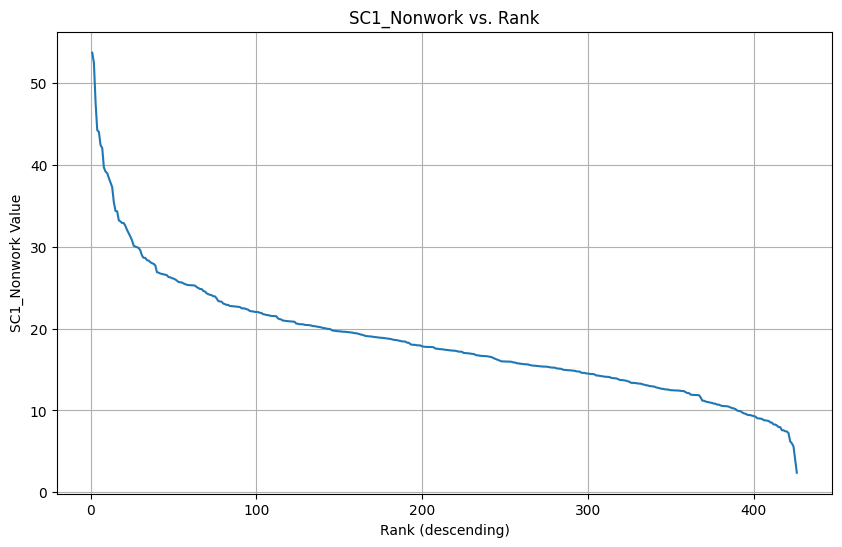

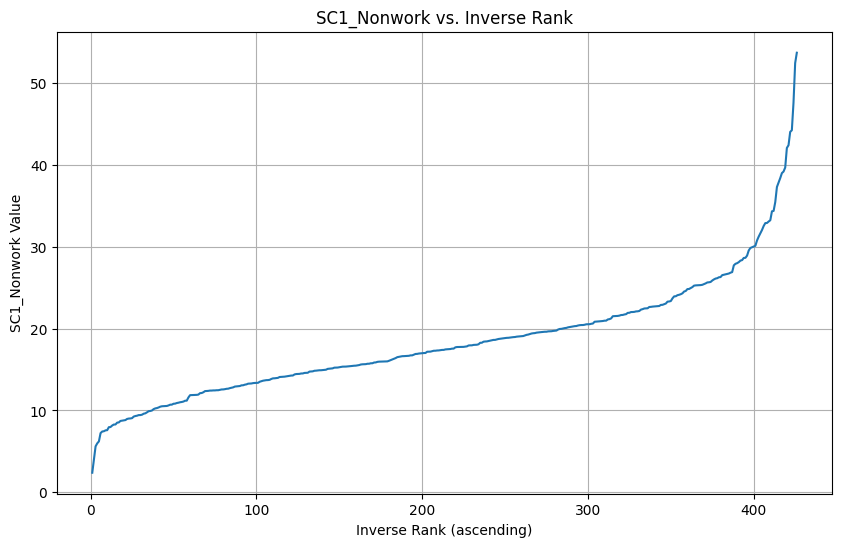

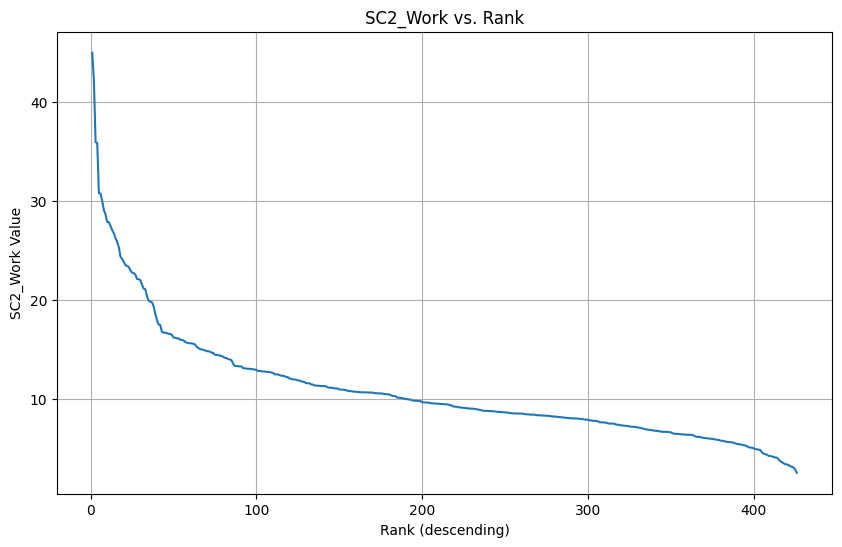

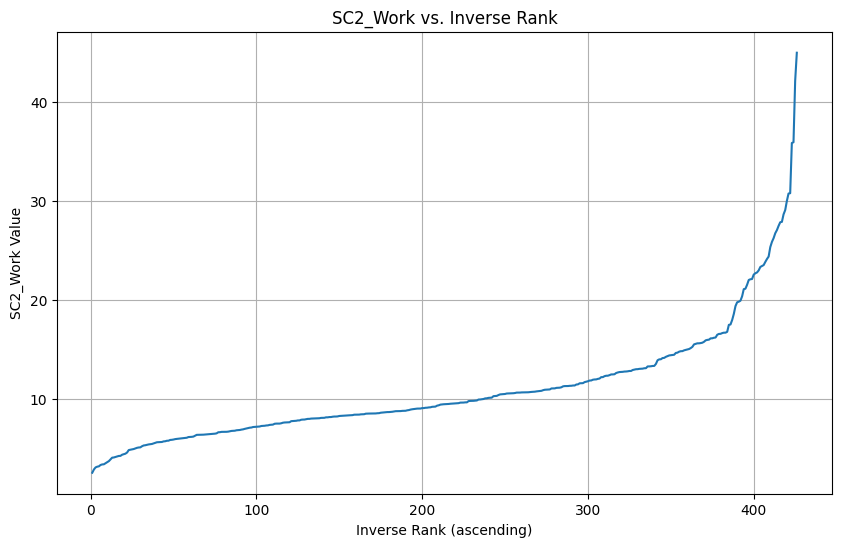

In [10]:
# List of indices
indices = ['PE1_Nonwork_diffOD_intraSeoul', 'PE2_Nonwork_diffOD_Korea',
       'PE3_Nonwork_allOD_intraSeoul', 'PE4_Nonwork_allOD_Korea',
       'PE5_Work_diffOD_intraSeoul', 'PE6_Work_diffOD_Korea',
       'PE7_Work_allOD_intraSeoul', 'PE8_Work_allOD_Korea', 'SC1_Nonwork',
       'SC2_Work']

# Function to plot index vs. rank and inverse rank
def plot_rank_curves(df, index_name):
    data = df[index_name]
    sorted_values = data.sort_values(ascending=False).reset_index(drop=True)
    rank = np.arange(1, len(sorted_values) + 1)
    inverse_rank = len(sorted_values) - rank + 1

    # Index vs. Rank
    plt.figure(figsize=(10, 6))
    plt.plot(rank, sorted_values)
    plt.xlabel('Rank (descending)')
    plt.ylabel(f'{index_name} Value')
    plt.title(f'{index_name} vs. Rank')
    plt.grid(True)

    plt.savefig(os.path.join(save_dir, f"{index_name}_rank.png")) # Save the plot as an image file

    plt.show()
    plt.close()  # Close the figure to free memory


    # Index vs. Inverse Rank
    plt.figure(figsize=(10, 6))
    plt.plot(inverse_rank, sorted_values)
    plt.xlabel('Inverse Rank (ascending)')
    plt.ylabel(f'{index_name} Value')
    plt.title(f'{index_name} vs. Inverse Rank')
    plt.grid(True)

    plt.savefig(os.path.join(save_dir, f"{index_name}_inverse_rank.png"))
    plt.show()
    plt.close()

# Plot for each index
for index in indices:
    plot_rank_curves(df, index)


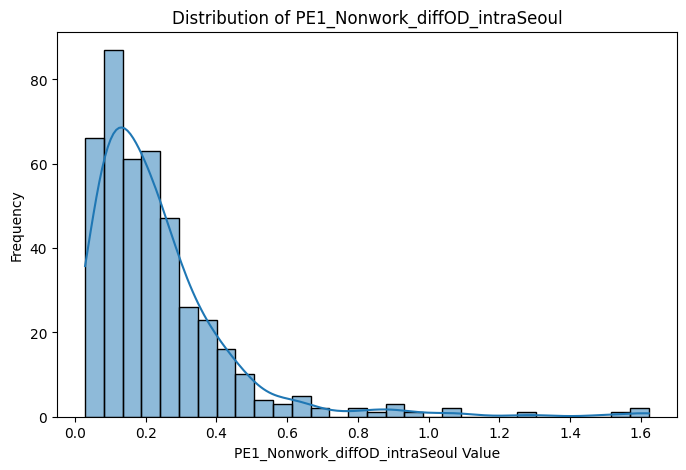

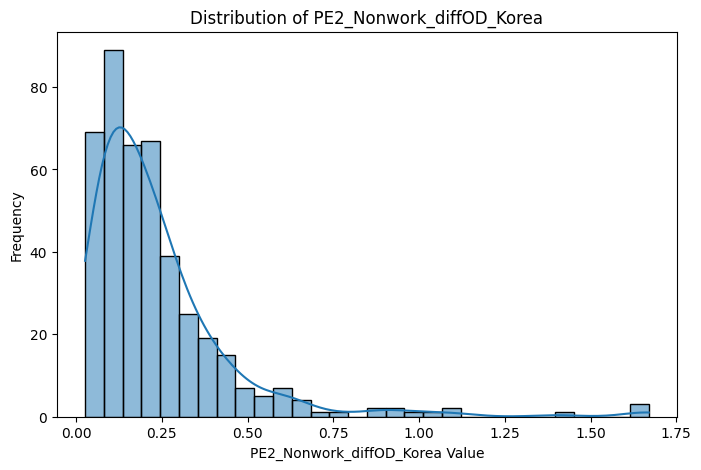

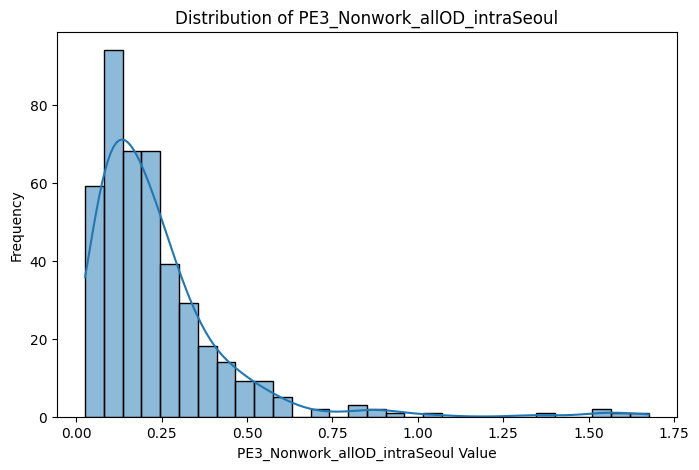

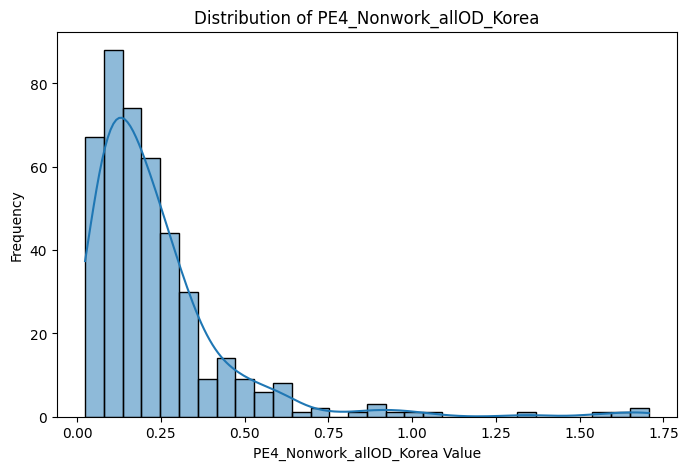

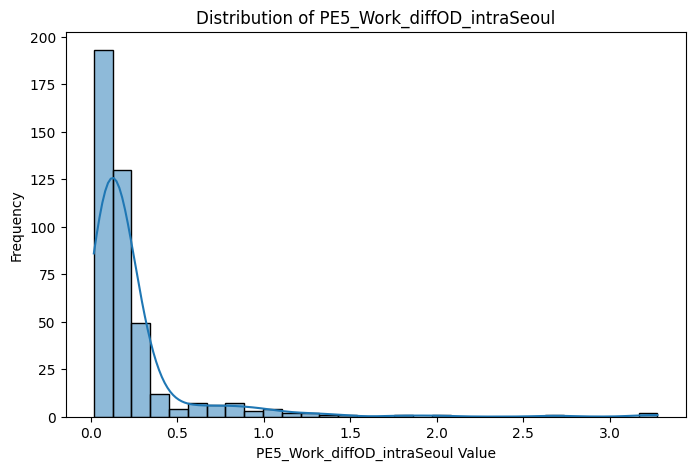

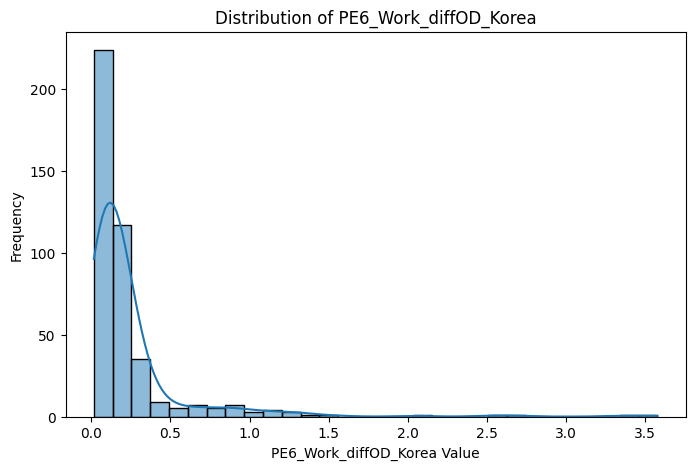

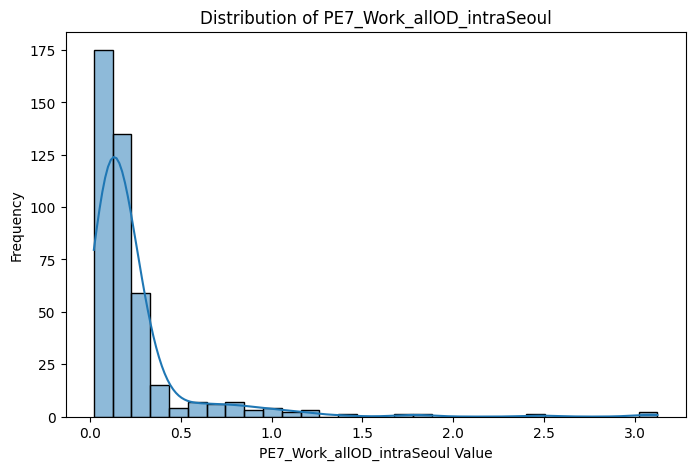

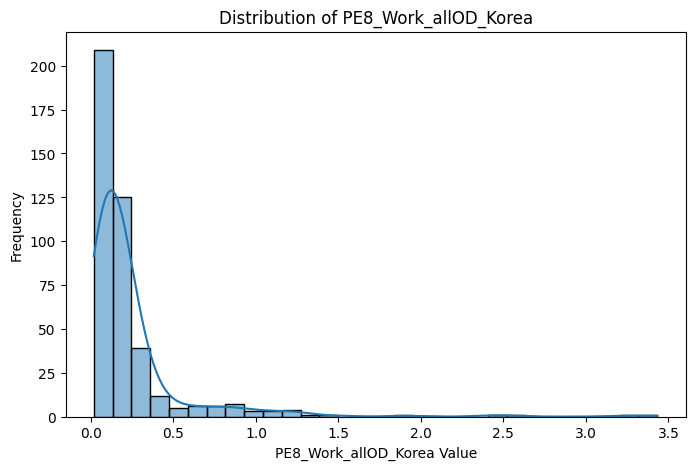

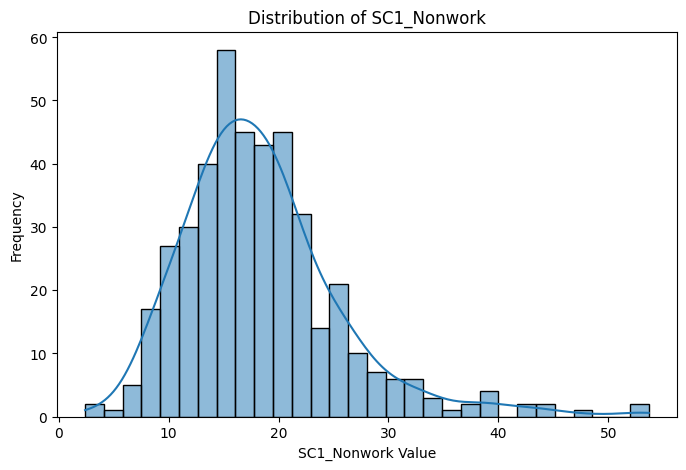

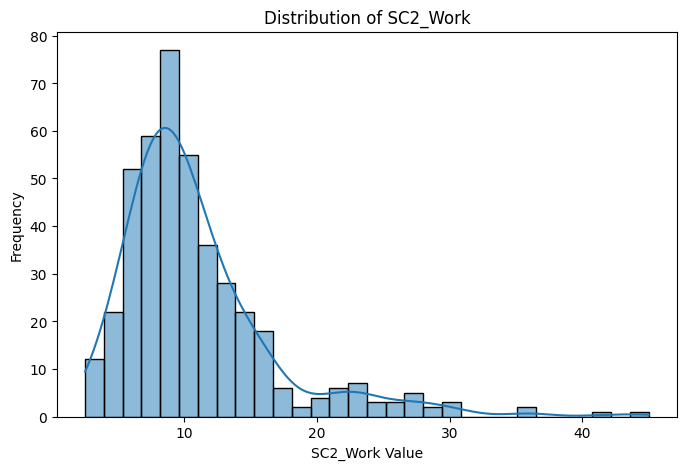

In [11]:
# Distribution plots
for index in indices:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[index], bins=30, kde=True)
    plt.title(f'Distribution of {index}')
    plt.xlabel(f'{index} Value')
    plt.ylabel('Frequency')

    plt.savefig(os.path.join(save_dir, f"{index}_distribution.png"))
    plt.show()
    plt.close()

In [12]:
# Summary statistics
summary_stats = df[indices].describe()
print("Summary Statistics:\n", summary_stats)
summary_stats.to_excel('/content/drive/MyDrive/FMC_Data/M-B_data_by_purpose_domestic_residents/PE_and_SC_Indices_summary_statistics.xlsx')

Summary Statistics:
        PE1_Nonwork_diffOD_intraSeoul  PE2_Nonwork_diffOD_Korea  \
count                     426.000000                426.000000   
mean                        0.234742                  0.234742   
std                         0.208378                  0.219268   
min                         0.028462                  0.026031   
25%                         0.100856                  0.096386   
50%                         0.187406                  0.181841   
75%                         0.289441                  0.282637   
max                         1.622106                  1.669603   

       PE3_Nonwork_allOD_intraSeoul  PE4_Nonwork_allOD_Korea  \
count                    426.000000               426.000000   
mean                       0.234742                 0.234742   
std                        0.213494                 0.221892   
min                        0.025927                 0.023760   
25%                        0.100049                 0.096840   
